In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.svm import SVC

In [3]:
df=pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Email 688,2,5,2,1,0,1,13,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
688,Email 689,2,0,1,1,0,0,15,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
689,Email 690,1,0,1,1,0,0,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
690,Email 691,1,2,1,0,1,0,19,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
x=df.drop(columns=["Email No.","Prediction"],errors="ignore")
x = x.fillna(0) #removeifnotrequired
df = df.dropna(subset=['Prediction']) #removeifnotrequired
y=df["Prediction"]


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [22]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
svm_predict=svm.predict(x_test)

print("Accuracy:",accuracy_score(y_test,svm_predict))
print("Confusion Matrix:",confusion_matrix(y_test,svm_predict))
print("Classification Reports:",classification_report(y_test,svm_predict))

Accuracy: 0.8920863309352518
Confusion Matrix: [[92 10]
 [ 5 32]]
Classification Reports:               precision    recall  f1-score   support

         0.0       0.95      0.90      0.92       102
         1.0       0.76      0.86      0.81        37

    accuracy                           0.89       139
   macro avg       0.86      0.88      0.87       139
weighted avg       0.90      0.89      0.89       139



In [23]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_predict=knn.predict(x_test)

print("Accuracy:",accuracy_score(y_test,knn_predict))
print("Confusion Matrix:",confusion_matrix(y_test,knn_predict))
print("Classification Reports:",classification_report(y_test,knn_predict))

Accuracy: 0.6330935251798561
Confusion Matrix: [[55 47]
 [ 4 33]]
Classification Reports:               precision    recall  f1-score   support

         0.0       0.93      0.54      0.68       102
         1.0       0.41      0.89      0.56        37

    accuracy                           0.63       139
   macro avg       0.67      0.72      0.62       139
weighted avg       0.79      0.63      0.65       139



Text(627.9949494949494, 0.5, 'Actual')

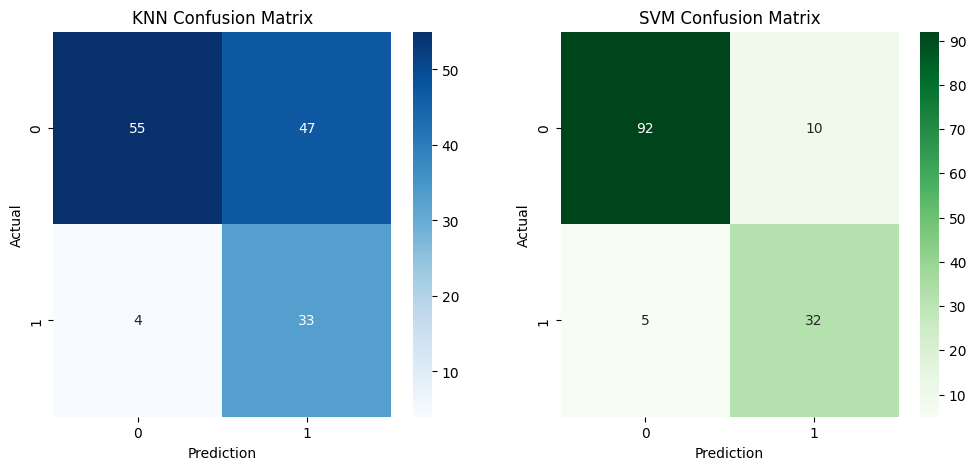

In [24]:
fig, ax=plt.subplots(1,2,figsize=(12,5))

sns.heatmap(confusion_matrix(y_test,knn_predict),annot=True,fmt="d",cmap="Blues",ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")
ax[0].set_xlabel("Prediction")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test,svm_predict),annot=True,fmt="d",cmap="Greens",ax=ax[1])
ax[1].set_title("SVM Confusion Matrix")
ax[1].set_xlabel("Prediction")
ax[1].set_ylabel("Actual")